In [13]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import py_fort_myrmidon as fm
import datetime
import networkx as nx
import community
import statistics
import scipy.stats as stats
from os import listdir
from datetime import datetime, date, timedelta
import pickle

In [14]:
working_dir = '/media/eg15396/EG_DATA-7/NTM/'
myrm_list = sorted([ s for s in listdir(working_dir) if s[15:17] == '.m'])

In [18]:

# initialise data-frame with properties
prop_df = pd.DataFrame(columns=['rep','exp', 'start', 'end', 'CC', 'partition', 'MOD', 'DEN', 'wDIA', 'DIA', 'DEH'])

# function to compute netowrk properties
def G_prop(G, start, end, name):
    
    # compute connencted components
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)

    # Define Giant Component
    GC = G.subgraph(Gcc[0])
    
    best_partition = community.best_partition(GC, weight='weight', randomize=False)
    return {'rep': int(name[8:10]),
            'exp': name[11:15],
            'start': fm.Time.ToDateTime(start), 
            'end': fm.Time.ToDateTime(end), 
            'CC': len(Gcc),
            'partition': np.max(list(best_partition.values())) + 1,
            'MOD': community.modularity(best_partition, GC), 
            'DEN': nx.density(GC), 
            'wDIA': nx.diameter(GC, e=nx.eccentricity(GC, sp=dict(nx.shortest_path_length(GC,weight='inv_weight')))), 
            'DIA': nx.diameter(GC),
            'DEH': statistics.pvariance([GC.degree(n) for n in GC.nodes()])}

In [19]:
## ========= PARAMETERS========= 
# Frame rate
frm_rate = 6

# maximum gap (s) for interaction computation
max_gap = 20

# minimum cumulative interaction duration (s)
min_cum_duration = 0 

# cumulative time window (s)
time_win = 60 * 60 * 12

## ============================ 

for myrm_file in myrm_list[20:]:
    
    print(myrm_file)
    
    # Open experiment file
    exp = fm.Experiment.Open(working_dir + myrm_file)

    # Number of ants
    N_ants = len(exp.Ants)    

    ## ------ Time window ------ 
    # define time window of cumulative network
    start_date = (fm.Time.ToDateTime(fm.Query.GetDataInformations(exp).End) +
                 timedelta(days = -1)).strftime("%Y-%m-%d")
    start = fm.Time(datetime.fromisoformat(start_date + 'T09:00:00'))

    #end = fm.Query.GetDataInformations(exp).End
    end = start.Add(fm.Duration(time_win * 10**9))
    ## --------------------------

    # initialise adj-matrix
    adj_mat = np.zeros((N_ants, N_ants))

    # Dictionary to convert timestamp of frame into corresponding frame number starting from 1 (with frame#1 at 'start' time)
    TimeToFrame = {fm.Time.ToTimestamp(frm[0].FrameTime): i + 1 for i,frm in enumerate(fm.Query.CollideFrames(exp,start=start,end=end))}

    # Populate network
    for i in fm.Query.ComputeAntInteractions(exp,start=start,end=end,maximumGap=fm.Duration(max_gap*10**9))[1]:
        adj_mat[i.IDs[0]-1, i.IDs[1]-1] += TimeToFrame[fm.Time.ToTimestamp(i.End)] - TimeToFrame[fm.Time.ToTimestamp(i.Start)]

    # interaction filtering (remove weak connections)
    adj_mat[adj_mat <  min_cum_duration * frm_rate] = 0

    # network build
    G = nx.Graph(adj_mat)

    # store inverse of weights
    nx.set_edge_attributes(G, 
                           {(i,j): 1/adj_mat[j,i] if adj_mat[j,i]>0 else 0 for i in range(len(adj_mat)) for j in range(i)},
                           'inv_weight')

    # Compute properties
    prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)

# Save
a_file = open("data/prop_data.pkl", "wb")
pickle.dump(prop_df, a_file)
a_file.close()

prop_df

    


EG_NTM_s13_DEHa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s13_DEHb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s14_MODa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s14_MODb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s15_DENa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s15_DENb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s16_DIAa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s16_DIAb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s17_MODa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s17_MODb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s18_DENa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s18_DENb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s19_DIAa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s19_DIAb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s20_DEHa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s20_DEHb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s21_DIAa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s21_DIAb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s22_MODa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s22_MODb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s23_DENa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s23_DENb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s24_DEHa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s24_DEHb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s25_DEHa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s25_DEHb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s26_DENa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s26_DENb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s27_MODa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s27_MODb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s28_DIAa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s28_DIAb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s29_DENa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s29_DENb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s30_MODa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s30_MODb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s31_DEHa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s31_DEHb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s32_DIAa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s32_DIAb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s33_MODa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s33_MODb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s34_DEHa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s34_DEHb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s35_DIAa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s35_DIAb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s36_DENa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s36_DENb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s37_DIAa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s37_DIAb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s38_DEHa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s38_DEHb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s39_DENa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s39_DENb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s40_MODa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s40_MODb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s41_DEHa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s41_DEHb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s42_DIAa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s42_DIAb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s43_DENa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s43_DENb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s44_MODa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s44_MODb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s45_DENa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s45_DENb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s46_DIAa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s46_DIAb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s47_DEHa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s47_DEHb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s48_MODa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s48_MODb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s49_MODa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s49_MODb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s50_DIAa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s50_DIAb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s51_DEHa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s51_DEHb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s52_DENa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s52_DENb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s53_DIAa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s53_DIAb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s54_MODa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s54_MODb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s55_DEHa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s55_DEHb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s56_DENa.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


EG_NTM_s56_DENb.myrmidon


/tmp/ipykernel_4052/3421888529.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prop_df = prop_df.append(G_prop(G, start, end, myrm_file), ignore_index=True)


,rep,exp,start,end,CC,partition,MOD,DEN,wDIA,DIA,DEH
0,13,DEHa,2021-09-12 09:00:00,2021-09-12 21:00:00,1,3,0.265934,0.964432,0.000959,2,62.734719
1,13,DEHb,2021-09-10 09:00:00,2021-09-10 21:00:00,1,3,0.24222,0.966289,0.000918,2,67.019309
2,14,MODa,2021-09-13 09:00:00,2021-09-13 21:00:00,1,4,0.293871,0.944481,0.001253,2,114.362474
3,14,MODb,2021-09-11 09:00:00,2021-09-11 21:00:00,1,3,0.213639,0.973502,0.001231,2,48.00076
4,15,DENa,2021-09-14 09:00:00,2021-09-14 21:00:00,1,3,0.280311,0.953569,0.0009,2,97.358765
...,...,...,...,...,...,...,...,...,...,...,...
83,54,MODb,2021-12-18 09:00:00,2021-12-18 21:00:00,1,5,0.180623,0.979296,0.000974,2,25.592593
84,55,DEHa,2021-12-21 09:00:00,2021-12-21 21:00:00,1,4,0.194317,0.984076,0.000687,2,20.453568
85,55,DEHb,2021-12-19 09:00:00,2021-12-19 21:00:00,1,4,0.162165,0.982428,0.000659,2,32.620648
86,56,DENa,2021-12-22 09:00:00,2021-12-22 21:00:00,1,4,0.200691,0.973129,0.000601,2,42.03654


In [25]:
prop_df.describe()


,rep,exp,start,end,CC,partition,MOD,DEN,wDIA,DIA,DEH
count,88,88,88,88,88,88,88.000000,88.000000,88.000000,88,88.000000
unique,44,8,66,66,3,5,88.000000,88.000000,88.000000,1,88.000000
top,13,DEHa,2021-09-12 09:00:00,2021-09-12 21:00:00,1,3,0.265934,0.964432,0.000959,2,62.734719
freq,2,11,2,2,79,38,1.000000,1.000000,1.000000,88,1.000000


In [170]:
# Open Pickle data

a_file = open("data/prop_data.pkl", "rb")
prop_df = pickle.load(a_file)
prop_df

,rep,exp,start,end,CC,partition,MOD,DEN,wDIA,DIA,DEH
0,3,DEHa,2021-08-22 09:00:00,2021-08-22 10:00:00,1,9,0.540942,0.314429,0.012808,3,700.236614
1,3,DEHb,2021-08-24 09:00:00,2021-08-24 10:00:00,1,9,0.527508,0.321877,0.041636,3,678.348944


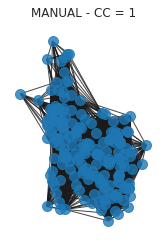

In [67]:

#%% PLOTTING network comparison
# starting node position for spring layout
sns.set(font_scale = 1)
plt.figure()
start_pos = nx.random_layout(G)

# manual 
pos = nx.spring_layout(GC,  iterations=100, pos=start_pos)
ax = plt.subplot(121)
nx.draw(GC, ax=ax, pos=pos, node_size=1*100, alpha=0.8)
p = plt.title('MANUAL - CC = ' +str(len(Gcc)))
